Sebuah toko retail "Toko Alat Tulis" memiliki data transaksi historis namun belum memanfaatkannya secara maksimal. Manajemen ingin mengetahui:

1. Bagaimana tren penjualan dari waktu ke waktu?
2. Seberapa efisien proses pemenuhan pesanan (apakah banyak pembatalan/retur)?
3. Produk apa yang menjadi tulang punggung penjualan?
4. Kota mana yang menyumbang pendapatan terbesar?

Tujuan: Memberikan rekomendasi berbasis data untuk meningkatkan pendapatan dan mengurangi tingkat kegagalan pesanan.

In [23]:
from google.colab import drive
%pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
engine = create_engine('sqlite://')

id_table = '1ygVCPaIvpUekBF9hTcx4UA3vTkBCQlx5'
url_file = f'https://drive.google.com/uc?export=download&id={id_table}'

df_table = pd.read_excel(url_file)
df_table.to_sql('data_table', con=engine, if_exists='replace', index=False)

%sql sqlite:///

query_check = """
SELECT * FROM data_table LIMIT 5;
"""

result_check = pd.read_sql_query(query_check, con=engine)
print(result_check)

  ID_Transaction Status Order   Payment                  Order_date  \
0      TX-000001    Completed  Transfer  2022-01-01 09:53:00.000000   
1      TX-000002    Completed        VA  2022-01-01 10:15:00.000000   
2      TX-000003    Completed       COD  2022-01-01 10:24:00.000000   
3      TX-000004    Completed  Transfer  2022-01-01 13:01:00.000000   
4      TX-000005      Pending        VA  2022-01-01 16:29:00.000000   

  ID_Customer            Nama     Gender  \
0      C01867  Naufal Saputra  Laki-laki   
1      C01389    Bella Wijaya  Laki-laki   
2      C04455   Fajar Harahap  Laki-laki   
3      C03574    Surya Wijaya  Perempuan   
4      C00950   Surya Santoso  Laki-laki   

                                       Alamat      Kota              Product  \
0  Jl. Kenanga No.333, Surabaya, Jatim, 60111  Surabaya         Cutter kecil   
1  Jl. Cempaka No.315, Surabaya, Jatim, 60111  Surabaya         Cutter kecil   
2     Jl. Mawar No.206, Denpasar, Bali, 80111  Denpasar            B

In [4]:
#check missing values

query_missing = """
SELECT 
    COUNT(*) AS missing_count,
    SUM(CASE WHEN ID_Transaction IS NULL THEN 1 ELSE 0 END) AS ID_Transaction_missing,
    SUM(CASE WHEN "Status Order" IS NULL THEN 1 ELSE 0 END) AS Status_Order_missing,
    SUM(CASE WHEN Payment IS NULL THEN 1 ELSE 0 END) AS Payment_missing,
    SUM(CASE WHEN Order_date IS NULL THEN 1 ELSE 0 END) AS Order_date_missing,
    SUM(CASE WHEN ID_Customer IS NULL THEN 1 ELSE 0 END) AS ID_Customer_missing,
    SUM(CASE WHEN Nama IS NULL THEN 1 ELSE 0 END) AS Nama_missing,
    SUM(CASE WHEN Gender IS NULL THEN 1 ELSE 0 END) AS Gender_missing,
    SUM(CASE WHEN Alamat IS NULL THEN 1 ELSE 0 END) AS Alamat_missing,
    SUM(CASE WHEN Kota IS NULL THEN 1 ELSE 0 END) AS Kota_missing,
    SUM(CASE WHEN Product IS NULL THEN 1 ELSE 0 END) AS Product_missing,
    SUM(CASE WHEN Brand IS NULL THEN 1 ELSE 0 END) AS Brand_missing,
    SUM(CASE WHEN Harga IS NULL THEN 1 ELSE 0 END) AS Harga_missing,
    SUM(CASE WHEN Kuantitas IS NULL THEN 1 ELSE 0 END) AS Kuantitas_missing,
    SUM(CASE WHEN Harga_Total IS NULL THEN 1 ELSE 0 END) AS Harga_Total_missing,
    SUM(CASE WHEN Total_Diskon IS NULL THEN 1 ELSE 0 END) AS Total_Diskon_missing,
    SUM(CASE WHEN Total_Sales IS NULL THEN 1 ELSE 0 END) AS Total_Sales_missing,
    SUM(CASE WHEN Biaya_Ongkir IS NULL THEN 1 ELSE 0 END) AS Biaya_Ongkir_missing,
    SUM(CASE WHEN Grand_Total IS NULL THEN 1 ELSE 0 END) AS Grand_Total_missing
FROM data_table;
"""

result_missing = pd.read_sql_query(query_missing, con=engine)
print(result_missing)

   missing_count  ID_Transaction_missing  Status_Order_missing  \
0          10000                       0                     0   

   Payment_missing  Order_date_missing  ID_Customer_missing  Nama_missing  \
0                0                   0                    0             0   

   Gender_missing  Alamat_missing  Kota_missing  Product_missing  \
0               0               0             0                0   

   Brand_missing  Harga_missing  Kuantitas_missing  Harga_Total_missing  \
0              0              0                  0                    0   

   Total_Diskon_missing  Total_Sales_missing  Biaya_Ongkir_missing  \
0                     0                    0                     0   

   Grand_Total_missing  
0                    0  


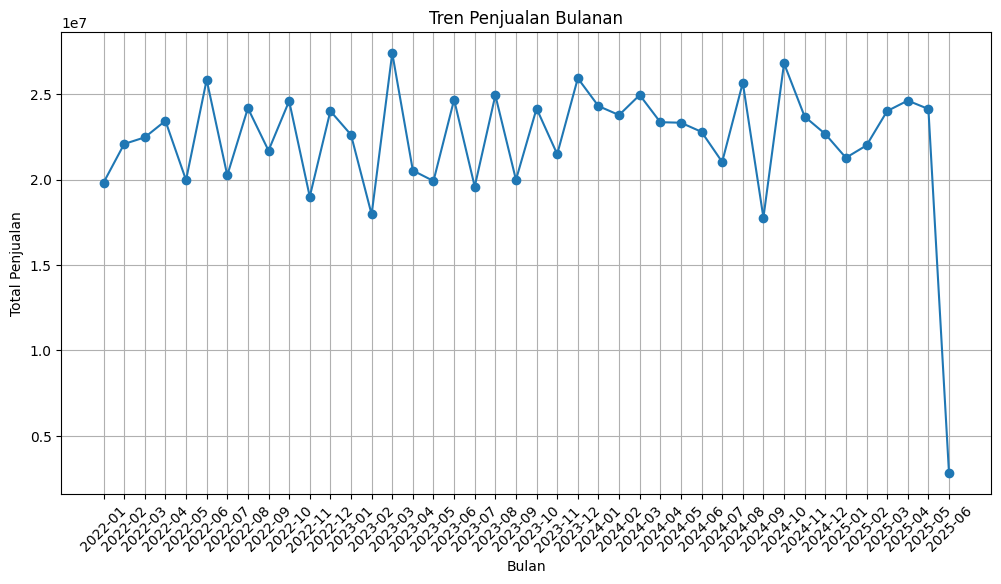

              last_order_date
0  2025-06-03 20:02:00.000000


In [5]:
# Visualisasi Tren Penjualan dari Waktu ke Waktu

query_sales_trend = """
SELECT
    strftime('%Y-%m', Order_date) AS order_month,
    SUM(Grand_Total) AS total_sales
FROM data_table
GROUP BY order_month
ORDER BY order_month;
"""

result_sales_trend = pd.read_sql_query(query_sales_trend, con=engine)
plt.figure(figsize=(12, 6))
plt.plot(result_sales_trend['order_month'], result_sales_trend['total_sales'], marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Check Tanggal order terakhir 2025-06

query_last_order = """
SELECT MAX(Order_date) AS last_order_date
FROM data_table;
"""

result_last_order = pd.read_sql_query(query_last_order, con=engine)
print(result_last_order)

Insight
 1. Rangepenjualan bulanan menunjukan tren fluktuatif dengan puncak tertentu. 
 2. adanya peningkatan penjualan pada bulan 8 tahun 2024.
 3. pada bulan terakhir yakni 2025-06 tren penjualan mengalami penurunan drastis yang mungkin disebabkan oleh data yang belum lengkap untuk bulan tersebut.


   total_orders
0         10000


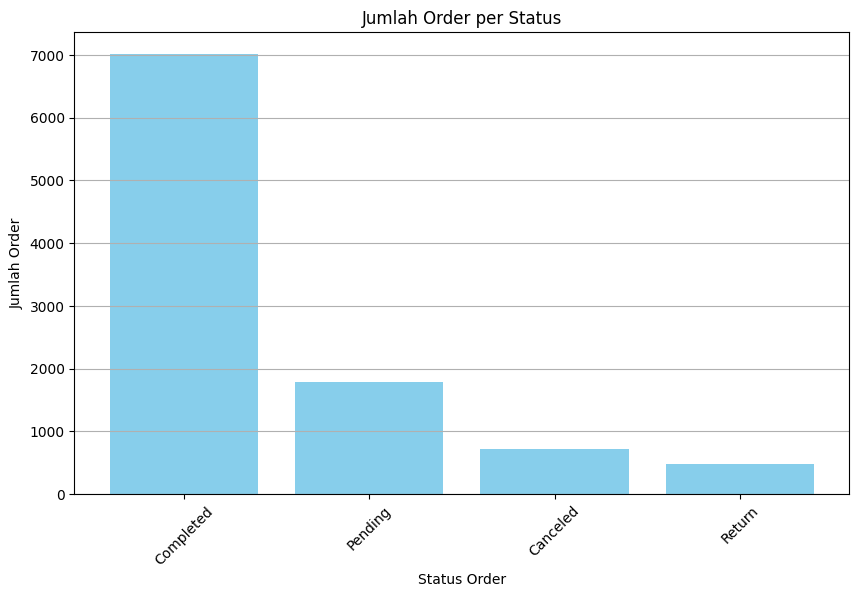

In [6]:
# Berapa Banyak Total Order

query_total_orders = """
SELECT COUNT(*) AS total_orders
FROM data_table;
"""

result_total_orders = pd.read_sql_query(query_total_orders, con=engine)
print(result_total_orders)

# Visualisasi Jumlah per Kategori Order

query_order_status = """
SELECT
    "Status Order",
    COUNT(*) AS order_count
FROM data_table
GROUP BY "Status Order"
ORDER BY order_count DESC;
"""

result_order_status = pd.read_sql_query(query_order_status, con=engine)
plt.figure(figsize=(10, 6))
plt.bar(result_order_status['Status Order'], result_order_status['order_count'], color='skyblue')
plt.title('Jumlah Order per Status')
plt.xlabel('Status Order')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

 Insight
 1. Ada Total 10000 Order dalam dataset ini
 2. Jumlah Order dengan Status Cancelled kurang dari 1000
 3. Order dengan Status Completed mendominasi keseluruhan Order

        Brand  total_sales
0     Officeo     47786585
1    Artlinez     44342725
2    Pentagio     42959856
3    Inkspire     41700472
4      Quillo     41439814
5       Mepen     40910596
6      Writex     40485155
7     Statvio     40066687
8     Markify     39614891
9     Inklite     39597180
10   Prograph     39342410
11     Vectro     39297866
12     Pensta     38794928
13    Papirus     38190752
14   DraftLab     37981866
15   Flowline     37779382
16     Notivo     37389737
17    Draftex     37254195
18     Lumora     37082488
19   NexWrite     36795475
20       Lumo     36731991
21  Papermark     34432982
22     Scriba     33538351
23    Graphen     31950449


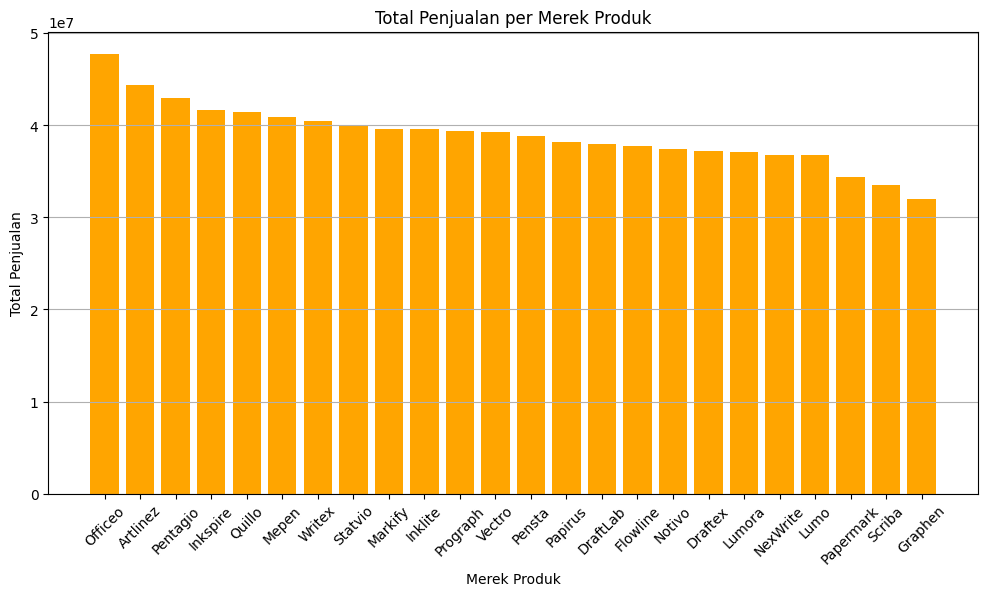

In [7]:
# Grand Total Sales Per Product Brand
query_sales_per_brand = """
SELECT
    Brand,
    SUM(Grand_Total) AS total_sales
FROM data_table
GROUP BY Brand
ORDER BY total_sales DESC;
"""

result_sales_per_brand = pd.read_sql_query(query_sales_per_brand, con=engine)
print(result_sales_per_brand)

plt.figure(figsize=(12, 6))
plt.bar(result_sales_per_brand['Brand'], result_sales_per_brand['total_sales'], color='orange')
plt.title('Total Penjualan per Merek Produk')
plt.xlabel('Merek Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Insight
 1. Penjualan tertinggi ada di Brand Officeo
 2. Penjualan terendah ada di Brand Graphen

         Kota  total_sales
0    Denpasar    282071236
1    Surabaya    208566817
2     Jakarta    124310241
3       Medan     88936031
4    Makassar     68118574
5  Yogyakarta     67751500
6    Semarang     55674994
7     Bandung     40037440


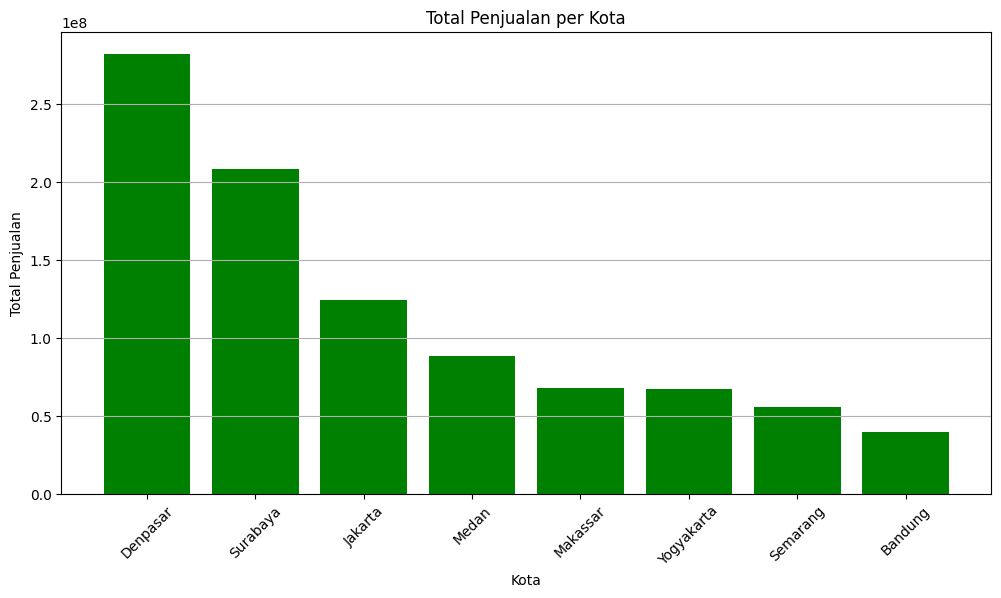

In [8]:
# Visualisasi Kota dengan Penjualan Tertinggi

query_sales_per_city = """
SELECT
    Kota,
    SUM(Grand_Total) AS total_sales
FROM data_table
GROUP BY Kota
ORDER BY total_sales DESC;
"""

result_sales_per_city = pd.read_sql_query(query_sales_per_city, con=engine)
print(result_sales_per_city)
plt.figure(figsize=(12, 6))
plt.bar(result_sales_per_city['Kota'], result_sales_per_city['total_sales'], color='green')
plt.title('Total Penjualan per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Insight
 1. Kota dengan penjualan tertinggi adalah Denpasar.
 2. Kota dengan penjualan terendah adalah Bandung.
 3. Kota Jakarta penjualannya dalam rentang 124310241

        Brand  total_sales
0    Artlinez     17764490
1     Officeo     15536388
2      Notivo     13469480
3        Lumo     13093932
4     Inklite     12990383
5      Quillo     12840125
6    Prograph     12680711
7      Pensta     12492783
8      Vectro     12450335
9     Statvio     11876683
10      Mepen     11711571
11     Writex     11592210
12     Lumora     11181875
13    Papirus     11164061
14    Markify     11140541
15   DraftLab     11116951
16  Papermark     10872878
17   Pentagio     10517604
18     Scriba     10509786
19   NexWrite      9918751
20    Draftex      9872740
21   Flowline      9260645
22   Inkspire      9033305
23    Graphen      8983008


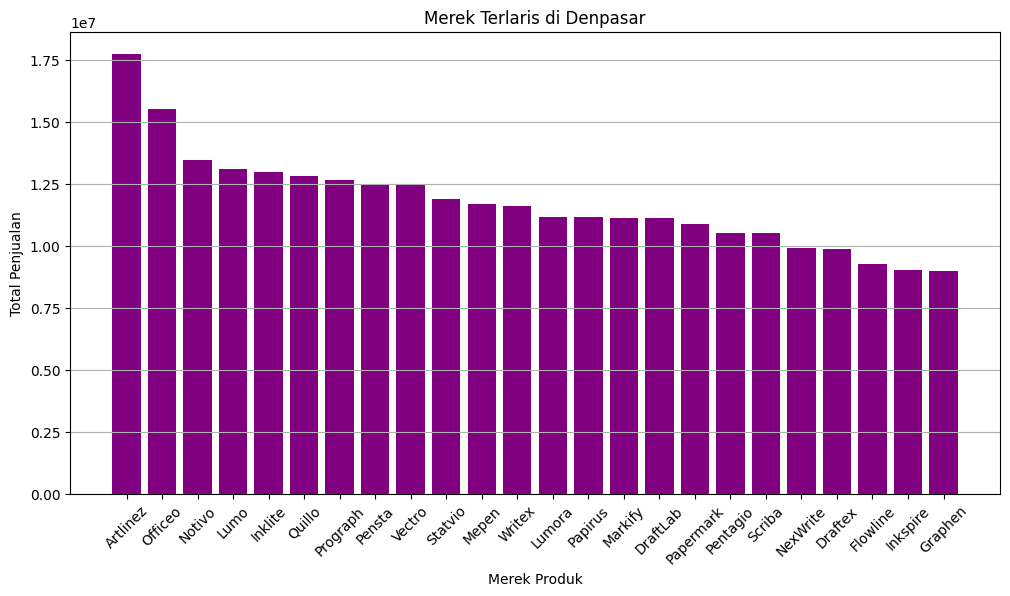

In [13]:
# Check di Denpasar Kenapa bisa jadi tertinggi

# Brand yang paling laku di Denpasar
query_top_brands_denpasar = """
SELECT
    Brand,
    SUM(Grand_Total) AS total_sales
FROM data_table
WHERE Kota = 'Denpasar'
GROUP BY Brand
ORDER BY total_sales DESC;
"""

result_top_brands_denpasar = pd.read_sql_query(query_top_brands_denpasar, con=engine)
print(result_top_brands_denpasar)

plt.figure(figsize=(12, 6))
plt.bar(result_top_brands_denpasar['Brand'], result_top_brands_denpasar['total_sales'], color='purple')
plt.title('Merek Terlaris di Denpasar')
plt.xlabel('Merek Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

                       Product  total_sales
0             Kalkulator Casio     54365235
1   Kertas HVS A4 70gsm 500lbr     29990259
2                    Binder A5     24389424
3          Stabilo Highlighter     16395830
4             Pulpen Pilot 0.5     16324422
5               Glue Stick UHU     15063529
6                       Map A4     14764966
7               Spidol Snowman     14664826
8                 Cutter kecil     14486466
9              Penghapus kecil     13424437
10              Penggaris 30cm     12559532
11         Buku Tulis Sidu 38L     12335144
12                Amplop Putih     12313780
13            Paper Clip Joyko     10485607
14            Amplop Coklat F4     10288371
15                   Pensil 2B     10219408


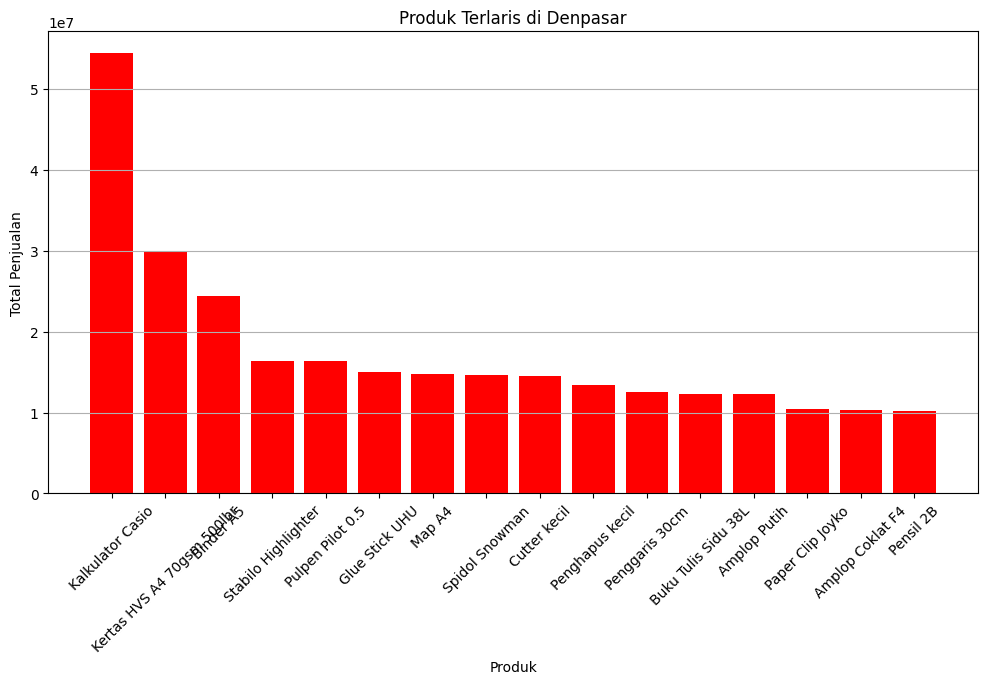

In [15]:
# Cek Produk yang paling laku di Denpasar

query_top_products_denpasar = """
SELECT
    Product,
    SUM(Grand_Total) AS total_sales
FROM data_table
WHERE Kota = 'Denpasar'
GROUP BY Product
ORDER BY total_sales DESC;
"""

result_top_products_denpasar = pd.read_sql_query(query_top_products_denpasar, con=engine)
print(result_top_products_denpasar)

plt.figure(figsize=(12, 6))
plt.bar(result_top_products_denpasar['Product'], result_top_products_denpasar['total_sales'], color='red')
plt.title('Produk Terlaris di Denpasar')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Check Gender Pelanggan di Denpasar

query_gender_denpasar = """
SELECT
    Gender,
    COUNT(*) AS customer_count
FROM data_table
WHERE Kota = 'Denpasar'
GROUP BY Gender;
"""

result_gender_denpasar = pd.read_sql_query(query_gender_denpasar, con=engine)
print(result_gender_denpasar)

      Gender  customer_count
0  Laki-laki            2697
1  Perempuan             279


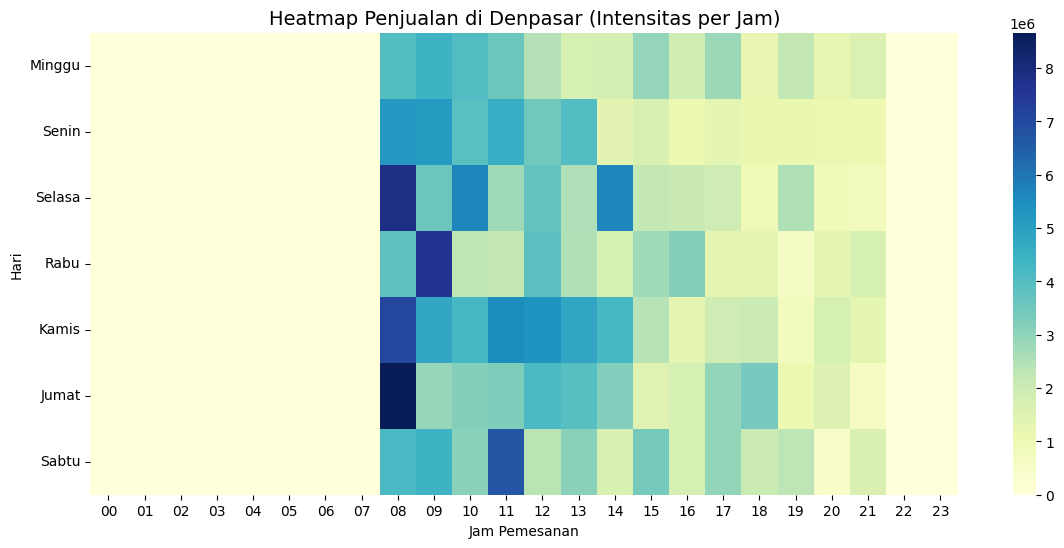

In [28]:
# Heatmap Penjualan Jam vs Hari di Denpasar

query_heatmap_denpasar = """
SELECT
    strftime('%H', Order_date) AS order_hour,
    strftime('%w', Order_date) AS order_day,
    SUM(Grand_Total) AS total_sales
FROM data_table
WHERE Kota = 'Denpasar'
GROUP BY order_hour, order_day;
"""

result_heatmap_denpasar = pd.read_sql_query(query_heatmap_denpasar, con=engine)
heatmap_data = result_heatmap_denpasar.pivot(index='order_day', columns='order_hour', values='total_sales')

days_order = [str(i) for i in range(7)] 
hours_order = [f"{i:02d}" for i in range(24)] 

heatmap_data = heatmap_data.reindex(index=days_order, columns=hours_order).fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=',.0f',
            yticklabels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])

plt.title('Heatmap Penjualan di Denpasar (Intensitas per Jam)', fontsize=14)
plt.xlabel('Jam Pemesanan')
plt.ylabel('Hari')
plt.yticks(rotation=0) 
plt.show()

In [35]:
# Analisis retensi pelanggan di Denpasar berdasarkan Nama

query_customer_retention_denpasar = """
SELECT
    Nama,
    COUNT(DISTINCT ID_Transaction) AS total_orders,
    SUM(Grand_Total) AS total_spent
FROM data_table
WHERE Kota = 'Denpasar'
GROUP BY Nama
HAVING total_orders > 1
ORDER BY total_orders DESC
LIMIT 10;
"""

result_customer_retention_denpasar = pd.read_sql_query(query_customer_retention_denpasar, con=engine)
print(result_customer_retention_denpasar)

# Cek Brand dan Produk apa saja dan Jumlah produk yang dibeli oleh Vania Simanjuntak di Denpasar

query_vania_purchases = """
SELECT
    Brand,
    Product,
    SUM(Kuantitas) AS total_quantity,
    SUM(Grand_Total) AS total_spent
FROM data_table
WHERE Kota = 'Denpasar' AND Nama = 'Vania Simanjuntak'
GROUP BY Brand, Product
ORDER BY total_quantity DESC
limit 10;
"""

result_vania_purchases = pd.read_sql_query(query_vania_purchases, con=engine)
print(result_vania_purchases)

                Nama  total_orders  total_spent
0  Vania Simanjuntak          2340    205321119
1    Bintang Maulana            69      8655726
2   Dinda Nainggolan            10       742280
3         Rina Utami             5       761565
4       Fahri Fauzan             4      1224031
5          Yuli Gani             3       217757
6      Vera Ramadhan             3       321238
7      Vania Maulana             3       213900
8         Vania Gani             3       225606
9    Rizky Pamungkas             3       362197
      Brand              Product  total_quantity  total_spent
0  Artlinez       Glue Stick UHU              48      1228300
1  Pentagio     Amplop Coklat F4              42       310613
2  Pentagio       Spidol Snowman              41       955223
3   Graphen         Amplop Putih              39       807355
4  NexWrite       Spidol Snowman              39       267702
5   Officeo  Stabilo Highlighter              39       947759
6   Statvio            Binder A5      

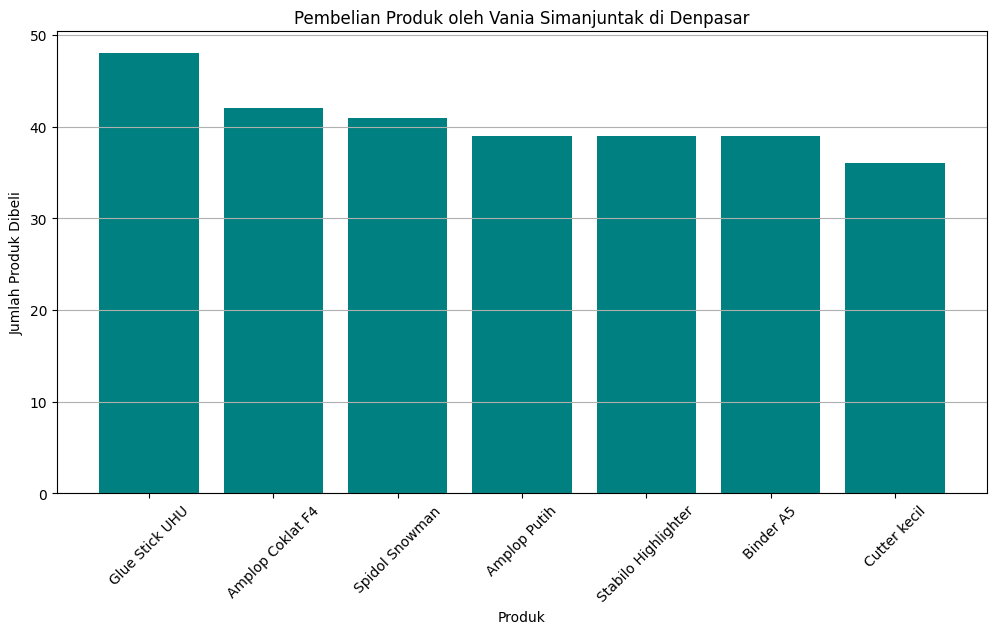

In [36]:
# Visualisasi Pembelian Vania Simanjuntak di Denpasar
plt.figure(figsize=(12, 6))
plt.bar(result_vania_purchases['Product'], result_vania_purchases['total_quantity'], color='teal')
plt.title('Pembelian Produk oleh Vania Simanjuntak di Denpasar')
plt.xlabel('Produk')
plt.ylabel('Jumlah Produk Dibeli')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Insight Kota Denpasar

1. Dominasi Pendapatan
   - Dominasi Total: Vania Simanjuntak menyumbang Rp 205 Juta (72%) dari total omzet Denpasar sebesar Rp 282 Juta.
   - Risiko Konsentrasi: Cabang Denpasar memiliki High Concentration Risk. Status "Kota Juara" sangat rapuh karena bergantung pada satu pelanggan. Jika Vania churn (berhenti), pendapatan kota ini akan runtuh.

2. Profil Pelanggan B2B (Grosir)
   - Pola Belanja: Barang yang dibeli adalah kombinasi aset kantor (Kalkulator Casio) dan barang habis pakai (Kertas HVS, Lem) dalam jumlah masif.
   - Identifikasi: Vania kemungkinan besar adalah Admin Kantor/Procurement atau Reseller, bukan pembeli perorangan biasa (End User).
